/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


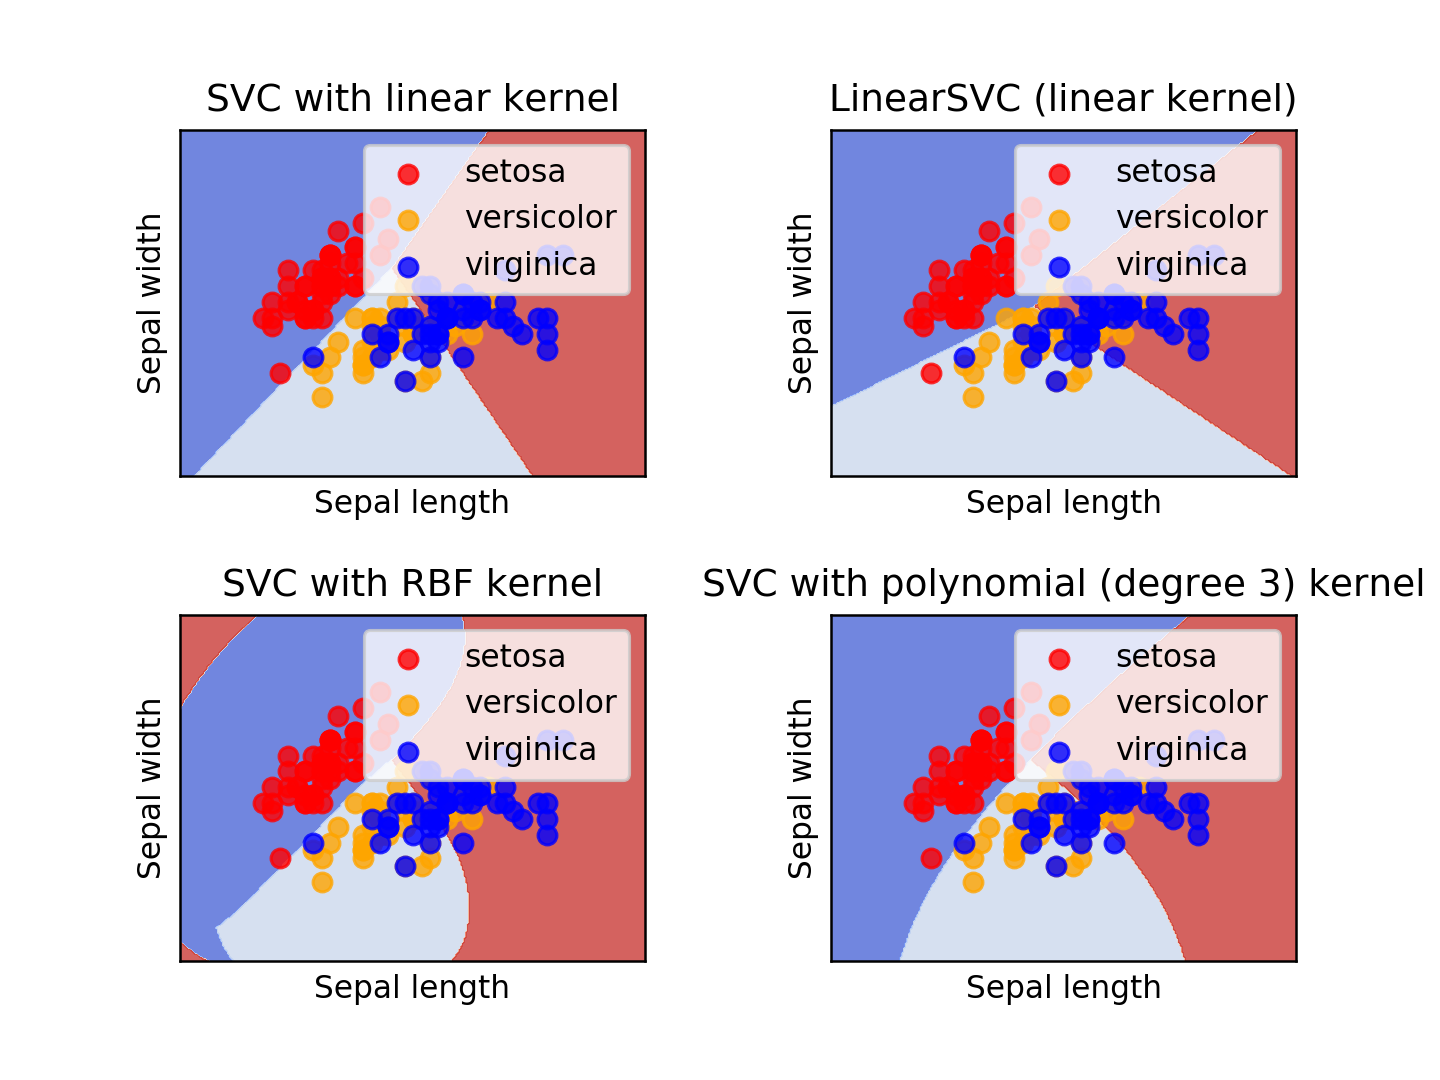

 SVC with linear kernel 모델의 정답률 = 0.7631578947368421
 LinearSVC (linear kernel) 모델의 정답률 = 0.8157894736842105
 SVC with RBF kernel 모델의 정답률 = 0.7631578947368421
 SVC with polynomial (degree 3) kernel 모델의 정답률 = 0.7631578947368421


In [86]:
%matplotlib notebook

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

data_train, data_test, label_train, label_test = train_test_split(X, y)

svc = svm.SVC(kernel='linear', C=C).fit(data_train, label_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(data_train, label_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(data_train, label_train)
lin_svc = svm.LinearSVC(C=C).fit(data_train, label_train)

#step
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

colours = ['red', 'orange', 'blue']
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
#     plt.subplot(2, 2, i + 1)
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel 함수 공부
    predict = clf.predict(data_test)
    ac_score = metrics.accuracy_score(label_test, predict)
    print(f" {titles[i]} 모델의 정답률 =", ac_score)
    colors = ['red','green','blue']
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # contourf 공부, alpha는 투명도

    # Plot also the training points
    for j in range(3):
        plt.scatter(X[:, 0][y==j], X[:, 1][y==j], color=colours[j], alpha=0.8, label=iris.target_names[j])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.legend()

plt.show()